# Script n°1 : Data exploration + feature selection

L'objectif de ce notebook est d'explorer les données mises à disposition par l'API [data.nba.net](https://github.com/kashav/nba.js/tree/master/docs/api) afin de détecter des corrélations et faire la selection optimale pour le modèle de prédiction.

#### Rappel

Le but est de prédire le vainqueur d'un match entre 2 équipes de NBA. Dans une v1 du projet nous nous sommes uniquement basés sur les données des matchs pour établir notre modèle.

### Imports

In [5]:
import matplotlib as mpl, matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import time

%matplotlib inline
import warnings
warnings.simplefilter(action="ignore")

### Chargement des données (matchs 2019)

2019 correspond à la saison passée. 2020 correspond à la saison en cours (2020/2012). Nous entrainons donc notre modèle à partir des données de 2019.

In [6]:
all_matchs = pd.read_excel("data/nba_matchs_2019.xlsx", header = 0)
all_matchs.head()

Match_ID  isStartTimeTBD  startDateEastern startTimeEastern       hTeam  \
0  11900002           False          20191004       1:00 AM ET  1610612746   
1  11900003           False          20191004       9:30 AM ET  1610612758   
2  11900005           False          20191005       9:30 AM ET  1610612754   
3  11900006           False          20191005       8:00 PM ET  1610612744   
4  11900007           False          20191005       8:30 PM ET  1610612759   

   hTeam_score       vTeam  vTeam_score  hfgm  vfgm  ...  hsteals  vsteals  \
0           96  1610612745          109    33    33  ...        5       11   
1          131  1610612754          132    44    48  ...        8       11   
2          130  1610612758          106    49    31  ...        7       10   
3          101  1610612747          123    35    47  ...       10        9   
4           89  1610612753          125    33    51  ...        9       18   

   hturnovers  vturnovers  hblocks  vblocks  hplusMinus  vplusMinus  \
0          22          20        8        5         -13          13   
1          22          24        4        3          -1           1   
2          20          18       10        7          24         -24   
3          16          14        2        1         -22          22   
4          22          15        3        8         -36          36   

   hteam_fouls  vteam_fouls  
0           32           22  
1           26           26  
2           27           20  
3           23           21  
4           16           17  

[5 rows x 46 columns]

In [7]:
# Shape de notre dataframe
all_matchs.shape

(1241, 46)

1241 lignes (nombre de matchs sur la saison 2019, ce qui est peu pour un modèle fiable)

47 colonnes (tri à opérer pour une plus fine selection)

### Ajout de la colonne target
Notre problématique est de prédire le vainqueur d'un match entre 2 équipes. Notre target sera donc la variable qui determine si l'équipe à domicile à gagner ou non.

In [8]:
all_matchs.loc[all_matchs['hTeam_score'] > all_matchs['vTeam_score'], 'isHTeamWin'] = 1
all_matchs.loc[all_matchs['hTeam_score'] <= all_matchs['vTeam_score'], 'isHTeamWin'] = 0
all_matchs

Match_ID  isStartTimeTBD  startDateEastern startTimeEastern       hTeam  \
0     11900002           False          20191004       1:00 AM ET  1610612746   
1     11900003           False          20191004       9:30 AM ET  1610612758   
2     11900005           False          20191005       9:30 AM ET  1610612754   
3     11900006           False          20191005       8:00 PM ET  1610612744   
4     11900007           False          20191005       8:30 PM ET  1610612759   
...        ...             ...               ...              ...         ...   
1236  41900402           False          20201002       9:00 PM ET  1610612747   
1237  41900403           False          20201004       7:30 PM ET  1610612748   
1238  41900404           False          20201006       9:00 PM ET  1610612748   
1239  41900405           False          20201009       9:00 PM ET  1610612747   
1240  41900406           False          20201011       7:30 PM ET  1610612748   

      hTeam_score       vTeam  vTeam_score  hfgm  vfgm  ...  vsteals  \
0              96  1610612745          109    33    33  ...       11   
1             131  1610612754          132    44    48  ...       11   
2             130  1610612758          106    49    31  ...       10   
3             101  1610612747          123    35    47  ...        9   
4              89  1610612753          125    33    51  ...       18   
...           ...         ...          ...   ...   ...  ...      ...   
1236          124  1610612748          114    49    36  ...        2   
1237          115  1610612747          104    41    34  ...        8   
1238           96  1610612747          102    32    35  ...        5   
1239          108  1610612748          111    38    38  ...        7   
1240           93  1610612747          106    35    43  ...        5   

      hturnovers  vturnovers  hblocks  vblocks  hplusMinus  vplusMinus  \
0             22          20        8        5         -13          13   
1             22          24        4        3          -1           1   
2             20          18       10        7          24         -24   
3             16          14        2        1         -22          22   
4             22          15        3        8         -36          36   
...          ...         ...      ...      ...         ...         ...   
1236           9           9        3        1          10         -10   
1237          12          19        3        2          11         -11   
1238          11          15        3        4          -6           6   
1239          15          13        5        3          -3           3   
1240          13          12        4        4         -13          13   

      hteam_fouls  vteam_fouls  isHTeamWin  
0              32           22         0.0  
1              26           26         0.0  
2              27           20         1.0  
3              23           21         0.0  
4              16           17         0.0  
...           ...          ...         ...  
1236           24           20         1.0  
1237           22           19         1.0  
1238           19           14         0.0  
1239           19           17         0.0  
1240           17           19         0.0  

[1241 rows x 47 columns]

### Visualisation de la répartition de la variable target dans les données

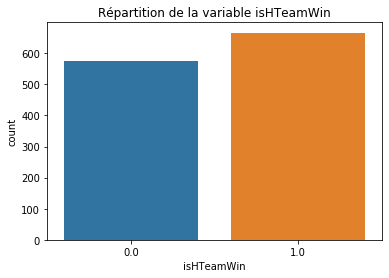

In [9]:
sns.countplot(x = all_matchs['isHTeamWin'], data = all_matchs)
plt.title('Répartition de la variable isHTeamWin')
plt.show()

On constate que nous ne sommes pas dans un cas d'*imbalanced dataset* : la répartition du target est presque équivalente.

In [10]:
print(f"{all_matchs[all_matchs['isHTeamWin'] == 0].count()[0]}/{all_matchs.shape[0]} lignes pour isHTeamWin = 0")
print(f"{all_matchs[all_matchs['isHTeamWin'] == 1].count()[1]}/{all_matchs.shape[0]} lignes pour isHTeamWin = 1")

575/1241 lignes pour isHTeamWin = 0
666/1241 lignes pour isHTeamWin = 1


### Corrélations entre les features et la target

#### Matrice de corrélation brute

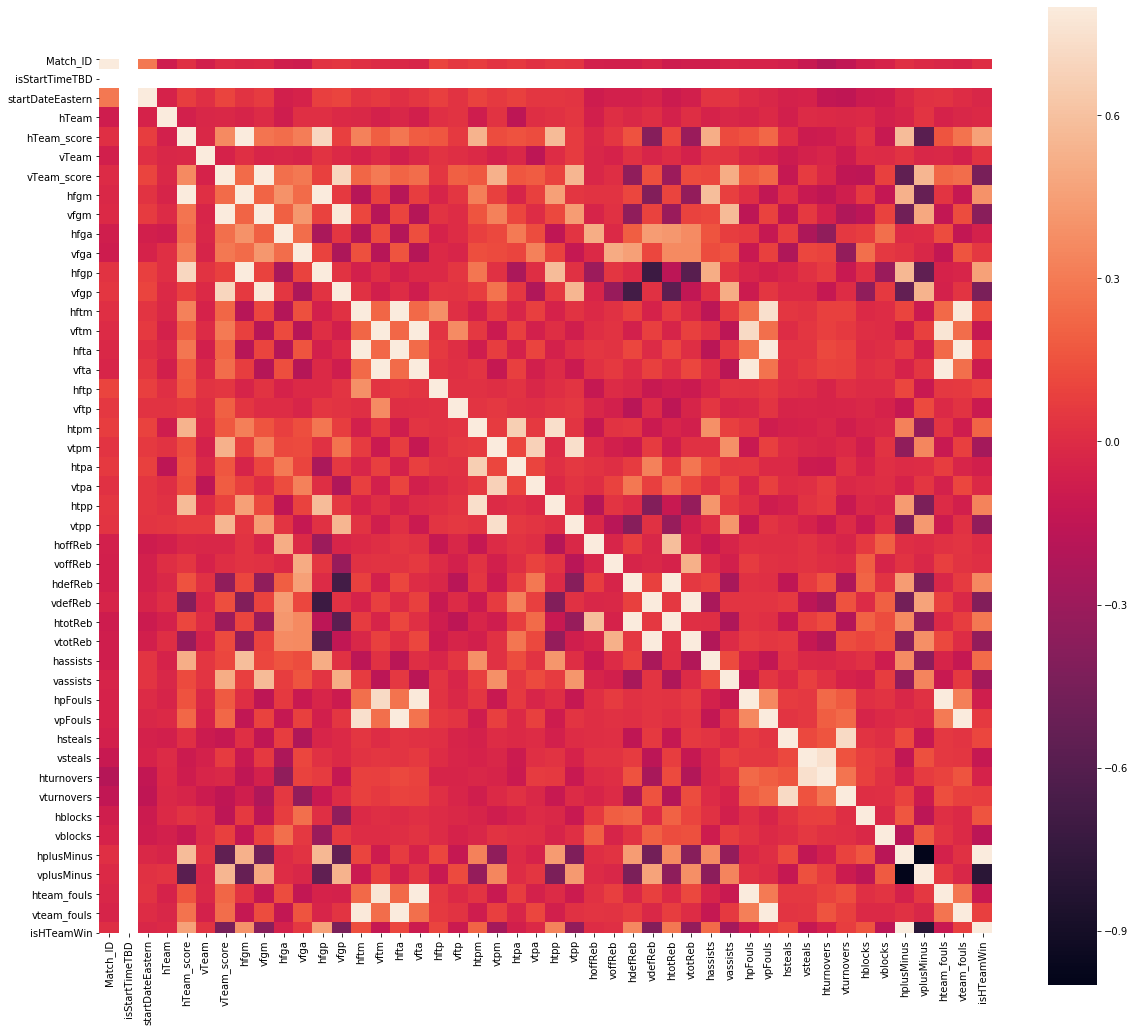

In [11]:
corrmat = all_matchs.corr()
f, ax = plt.subplots(figsize=(20,18))
sns.heatmap(corrmat, vmax=.8, square=True)

On peut distinguer quelques corrélations mais il y a trop de variables pour que ce soit vraiment clair. Il faut trier et réduire la taille de la matrice pour mieux comprendre.

#### Matrice de corrélation en ne sélectionnant que les 20 features les plus corrélées à la target (isHTeamWin)

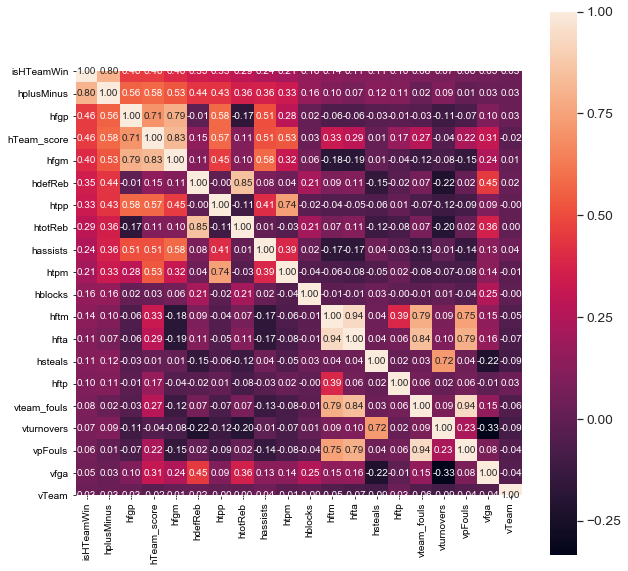

In [12]:
k = 20
cols = all_matchs.corr().nlargest(k, 'isHTeamWin')['isHTeamWin'].index
f, ax = plt.subplots(figsize=(10,10))
cm = np.corrcoef(all_matchs[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Trie des corrélations (positives ou négatives) par rapport à la target

In [13]:
corr_sorted = all_matchs.corr()['isHTeamWin'].drop(['isHTeamWin']).dropna().sort_values()

In [14]:
# Affichage des corrélations positives (triées du + au -)
pd.DataFrame(
    [corr_sorted.where(corr_sorted > 0).dropna().sort_values(ascending=False)]
).T.rename(columns={'isHTeamWin':'Correlation w/ target'})

Correlation w/ target
hplusMinus                0.802096
hfgp                      0.457279
hTeam_score               0.456863
hfgm                      0.397081
hdefReb                   0.352261
htpp                      0.332483
htotReb                   0.288371
hassists                  0.243475
htpm                      0.209598
hblocks                   0.157518
hftm                      0.137058
hfta                      0.110761
hsteals                   0.109234
hftp                      0.096977
vteam_fouls               0.079896
vturnovers                0.074554
vpFouls                   0.060244
vfga                      0.051789
vTeam                     0.032935
voffReb                   0.016776
Match_ID                  0.010637
hoffReb                   0.004180

Après trie sur les variables corrélées positivement, on observe que ces features influe de manière positive sur l'issue de la target isHTeamWin. Cohérent car il s'agit des variables de stats de l'équipe à domicile.

(`plusMinus` : différentiel entre le nombre de points marqués et le nombre de points encaissés)

---

In [15]:
# Affichage des corrélations négatives (triées du + au -)
pd.DataFrame(
    [corr_sorted.where(corr_sorted < 0).dropna().sort_values(ascending=True)]
).T.rename(columns={'isHTeamWin':'Correlation w/ target'})

Correlation w/ target
vplusMinus                    -0.802096
vTeam_score                   -0.451519
vfgp                          -0.437790
vdefReb                       -0.404335
vfgm                          -0.376480
vtpp                          -0.341423
vtotReb                       -0.335395
vtpm                          -0.263593
vassists                      -0.263248
vblocks                       -0.166895
vsteals                       -0.124178
vftm                          -0.122491
hteam_fouls                   -0.110928
vftp                          -0.101394
vfta                          -0.095655
hpFouls                       -0.077068
htpa                          -0.071116
hfga                          -0.057082
hturnovers                    -0.046670
startDateEastern              -0.026990
hTeam                         -0.014065
vtpa                          -0.012742

Après trie sur les variables corrélées négativement, on observe que ces features influe de manière négative sur l'issue de la target isHTeamWin. Cohérent car il s'agit des variables de stats de l'équipe à l'extérieur.

### Conclusion EDA

Le dataframe qui permettra de d'entrainer le modèle doit être construit avec une sélection des variables les plus corrélées (+ ou -) à la target. 

Après de multiples selections et tests divers des modèles, voici la liste des features retenues : 
- hTeam_score
- vTeam_score
- hfgm
- vfgm
- hfgp
- vfgp
- htpp
- vtpp
- hdefReb
- vdefReb
- htotReb
- vtotReb
- hplusMinus
- vplusMinus

### Constitution du dataframe pour le modèle

Nous avons choisi de constituer des KPIs pour chacune des variables listées ci-dessus, en prenant à un instant T de la saison la moyenne de l'indicateur de l'équipe sur l'ensemble de ses matchs précédents ainsi que sur ces 5 derniers matchs.

De ce fait, pour l'entrainement et les prédictions nous allons créer un dataframe basé sur celui des matchs et qui aura les colonnes suivantes (**1 ligne par match déroulé en 2019**) : 

| Colonne | Description |
|:--- | :--- |
| `isHTeamWin` | Target |
| `h_mean_score_saison` | Moyenne de points de l'équipe à domicile sur tous ces derniers matchs |
| `h_mean_score_last_five` | Moyenne de points de l'équipe à domicile sur ces 5 derniers matchs |
| `v_mean_score_saison` | Moyenne de points de l'équipe à l'extérieur sur tous ces derniers matchs |
| `v_mean_score_last_five` | Moyenne de points de l'équipe à l'extérieur sur ces 5 derniers matchs |
| `h_mean_fgm_saison` | Moyenne de tir marqué de l'équipe à domicile sur tous ces derniers matchs |
| `h_mean_fgm_last_five` | Moyenne de tir marqué de l'équipe à domicile sur ces 5 derniers matchs |
| `v_mean_fgm_saison` | Moyenne de tir marqué de l'équipe à l'extérieur sur tous ces derniers matchs |
| `v_mean_fgm_last_five` | Moyenne de tir marqué de l'équipe à l'extérieur sur ces 5 derniers matchs |
| ... | ... |

En sortie, on aura bien un dataframe qui contiendra pour chaque match en 2019 le vainqueur du match (`isHTeamWin`) ainsi que tous les indicateurs de performance et de forme des deux équipes juste avant ce match, basés sur leurs précédents matchs.

### Fonctions de calculs des KPIs

In [16]:
def calc_mean(team, date_match, name_kpi_h, name_kpi_v, last_5_matchs=False):
    
    # On recherche, dans tous les matchs de la saison 2019 :
    # - l'ensemble des matchs de l'équipe indiquée en paramètres (quand l'équipe jouait à domicile + extérieur)
    # - on prend l'ensemble de ses matchs qui se sont déroulés avant la date indiquée en paramètres
    team_matchs = all_matchs[
        ((all_matchs['hTeam'] == team) | (all_matchs['vTeam'] == team)) & (all_matchs['startDateEastern'] < date_match)
    ]
    
    # Si on est dans un calcul d'indicateur sur les 5 derniers matchs, on ne prend que les 5 dernières lignes du dataframe trié
    if(last_5_matchs):
        team_matchs = team_matchs[-5:]
    
    team_matchs.loc[team_matchs['hTeam'] == team, 'kpi'] = team_matchs[name_kpi_h]
    team_matchs.loc[team_matchs['vTeam'] == team, 'kpi'] = team_matchs[name_kpi_v]
    
    return team_matchs.describe()['kpi']['mean']

In [17]:
# Pas utilisé pour le moment, mais anticipé pour une v2
def calc_mean_confront(team1, team2, date_match, name_kpi_h, name_kpi_v):
    
    team_confront = all_matchs[
        (
            (
                (all_matchs['hTeam'] == team1) & (all_matchs['vTeam'] == team2)
            ) | (
                (all_matchs['hTeam'] == team2) & (all_matchs['vTeam'] == team1)
            )
        ) & (all_matchs['startDateEastern'] < date_match)
    ][-3:]
    
    team_confront.loc[team_confront['hTeam'] == team1, 'kpi_team1'] = team_confront[name_kpi_h]
    team_confront.loc[team_confront['vTeam'] == team1, 'kpi_team1'] = team_confront[name_kpi_v]
    
    team_confront.loc[team_confront['hTeam'] == team2, 'kpi_team2'] = team_confront[name_kpi_h]
    team_confront.loc[team_confront['vTeam'] == team2, 'kpi_team2'] = team_confront[name_kpi_v]
    
    return team_confront.describe()['kpi_team1']['mean'], team_confront.describe()['kpi_team2']['mean']

### Fonction de création du Dataframe des KPIs

In [18]:
def generate_kpi_dataframe(team1, team2, date_match):
    
    #
    ### SCORE
    #
    # Moyenne de l'équipe (h & v) sur tous ses matchs précédents (domicile + extérieur confondus)
    h_mean_score_saison = calc_mean(team1, date_match, 'hTeam_score', 'vTeam_score')
    v_mean_score_saison = calc_mean(team2, date_match, 'hTeam_score', 'vTeam_score')
    
    # Moyenne de l'équipe sur ses 5 derniers matchs (domicile + extérieur confondus)
    h_mean_score_last_five = calc_mean(team1, date_match, 'hTeam_score', 'vTeam_score', True)
    v_mean_score_last_five = calc_mean(team2, date_match, 'hTeam_score', 'vTeam_score', True)
    
    #
    ### FGM
    #
    # Moyenne de l'équipe sur tous ses matchs précédents (domicile + extérieur confondus)
    h_mean_fgm_saison = calc_mean(team1, date_match, 'hfgm', 'vfgm')
    v_mean_fgm_saison = calc_mean(team2, date_match, 'hfgm', 'vfgm')
    
    # Moyenne de l'équipe sur ses 5 derniers matchs (domicile + extérieur confondus)
    h_mean_fgm_last_five = calc_mean(team1, date_match, 'hfgm', 'vfgm', True)
    v_mean_fgm_last_five = calc_mean(team2, date_match, 'hfgm', 'vfgm', True)
    
    #
    ### FGP
    #
    # Moyenne de l'équipe sur tous ses matchs précédents (domicile + extérieur confondus)
    h_mean_fgp_saison = calc_mean(team1, date_match, 'hfgp', 'vfgp')
    v_mean_fgp_saison = calc_mean(team2, date_match, 'hfgp', 'vfgp')
    
    # Moyenne de l'équipe sur ses 5 derniers matchs (domicile + extérieur confondus)
    h_mean_fgp_last_five = calc_mean(team1, date_match, 'hfgp', 'vfgp', True)
    v_mean_fgp_last_five = calc_mean(team2, date_match, 'hfgp', 'vfgp', True)
    
    #
    ### TPP
    #
    # Moyenne de l'équipe sur tous ses matchs précédents (domicile + extérieur confondus)
    h_mean_tpp_saison = calc_mean(team1, date_match, 'htpp', 'vtpp')
    v_mean_tpp_saison = calc_mean(team2, date_match, 'htpp', 'vtpp')
    
    # Moyenne de l'équipe sur ses 5 derniers matchs (domicile + extérieur confondus)
    h_mean_tpp_last_five = calc_mean(team1, date_match, 'htpp', 'vtpp', True)
    v_mean_tpp_last_five = calc_mean(team2, date_match, 'htpp', 'vtpp', True)
    
    #
    ### DEF REB
    #
    # Moyenne de l'équipe sur tous ses matchs précédents (domicile + extérieur confondus)
    h_mean_defReb_saison = calc_mean(team1, date_match, 'hdefReb', 'vdefReb')
    v_mean_defReb_saison = calc_mean(team2, date_match, 'hdefReb', 'vdefReb')
    
    # Moyenne de l'équipe sur ses 5 derniers matchs (domicile + extérieur confondus)
    h_mean_defReb_last_five = calc_mean(team1, date_match, 'hdefReb', 'vdefReb', True)
    v_mean_defReb_last_five = calc_mean(team2, date_match, 'hdefReb', 'vdefReb', True)
    
    #
    ### TOT REB
    #
    # Moyenne de l'équipe sur tous ses matchs précédents (domicile + extérieur confondus)
    h_mean_totReb_saison = calc_mean(team1, date_match, 'htotReb', 'vtotReb')
    v_mean_totReb_saison = calc_mean(team2, date_match, 'htotReb', 'vtotReb')
    
    # Moyenne de l'équipe sur ses 5 derniers matchs (domicile + extérieur confondus)
    h_mean_totReb_last_five = calc_mean(team1, date_match, 'htotReb', 'vtotReb', True)
    v_mean_totReb_last_five = calc_mean(team2, date_match, 'htotReb', 'vtotReb', True)
    
    #
    ### PLUS MINUS
    #
    # Moyenne de l'équipe sur tous ses matchs précédents (domicile + extérieur confondus)
    h_mean_plusMinus_saison = calc_mean(team1, date_match, 'hplusMinus', 'vplusMinus')
    v_mean_plusMinus_saison = calc_mean(team2, date_match, 'hplusMinus', 'vplusMinus')
    
    # Moyenne de l'équipe sur ses 5 derniers matchs (domicile + extérieur confondus)
    h_mean_plusMinus_last_five = calc_mean(team1, date_match, 'hplusMinus', 'vplusMinus', True)
    v_mean_plusMinus_last_five = calc_mean(team2, date_match, 'hplusMinus', 'vplusMinus', True)
    
    return {        
        'h_mean_score_saison': h_mean_score_saison,
        'v_mean_score_saison': v_mean_score_saison,
        'h_mean_score_last_five': h_mean_score_last_five,
        'v_mean_score_last_five': v_mean_score_last_five,
        
        'h_mean_fgm_saison': h_mean_fgm_saison,
        'v_mean_fgm_saison': v_mean_fgm_saison,
        'h_mean_fgm_last_five': h_mean_fgm_last_five,
        'v_mean_fgm_last_five': v_mean_fgm_last_five,

        'h_mean_fgp_saison': h_mean_fgp_saison,
        'v_mean_fgp_saison': v_mean_fgp_saison,
        'h_mean_fgp_last_five': h_mean_fgp_last_five,
        'v_mean_fgp_last_five': v_mean_fgp_last_five,
        
        'h_mean_tpp_saison' : h_mean_tpp_saison,
        'v_mean_tpp_saison' : v_mean_tpp_saison,
        'h_mean_tpp_last_five' : h_mean_tpp_last_five,
        'v_mean_tpp_last_five' : v_mean_tpp_last_five,

        'h_mean_defReb_saison': h_mean_defReb_saison,
        'v_mean_defReb_saison': v_mean_defReb_saison,
        'h_mean_defReb_last_five': h_mean_defReb_last_five,
        'v_mean_defReb_last_five': v_mean_defReb_last_five,
        
        'h_mean_totReb_saison' : h_mean_totReb_saison,
        'v_mean_totReb_saison' : v_mean_totReb_saison,
        'h_mean_totReb_last_five' : h_mean_totReb_last_five,
        'v_mean_totReb_last_five' : v_mean_totReb_last_five,
        
        'h_mean_plusMinus_saison': h_mean_plusMinus_saison,
        'v_mean_plusMinus_saison': v_mean_plusMinus_saison,
        'h_mean_plusMinus_last_five': h_mean_plusMinus_last_five,
        'v_mean_plusMinus_last_five': v_mean_plusMinus_last_five
    }

### Boucle sur les matchs pour générer le Dataframe

In [8]:
%%time
matchs_kpi = pd.DataFrame(columns=[
    'isHTeamWin',
    
    'h_mean_score_saison',
    'v_mean_score_saison',
    'h_mean_score_last_five',
    'v_mean_score_last_five',
    
    'h_mean_fgm_saison',
    'v_mean_fgm_saison',
    'h_mean_fgm_last_five',
    'v_mean_fgm_last_five',
    
    'h_mean_fgp_saison',
    'v_mean_fgp_saison',
    'h_mean_fgp_last_five',
    'v_mean_fgp_last_five',
    
    'h_mean_tpp_saison',
    'v_mean_tpp_saison',
    'h_mean_tpp_last_five',
    'v_mean_tpp_last_five',
    
    'h_mean_defReb_saison',
    'v_mean_defReb_saison',
    'h_mean_defReb_last_five',
    'v_mean_defReb_last_five',
    
    'h_mean_totReb_saison',
    'v_mean_totReb_saison',
    'h_mean_totReb_last_five',
    'v_mean_totReb_last_five',
    
    'h_mean_plusMinus_saison',
    'v_mean_plusMinus_saison',
    'h_mean_plusMinus_last_five',
    'v_mean_plusMinus_last_five'
    
    # Pas utilisé pour le moment, mais anticipé pour une v2
    #'h_mean_score_last_three_confront',
    #'v_mean_score_last_three_confront'
])

df_time=[]

for index, row in all_matchs.iterrows():
    start_time_process = time.time()
    
    data = generate_kpi_dataframe(row['hTeam'], row['vTeam'], row['startDateEastern'])
    
    # not used
    """
    hTeam_mean_score_last_three_confront, vTeam_mean_score_last_three_confront = calc_mean_confront(
        row['hTeam'],
        row['vTeam'],
        row['startDateEastern'], 
        'hTeam_score', 
        'vTeam_score'
    )
    """
    
    data['isHTeamWin'] = int(row['isHTeamWin'])
    matchs_kpi = matchs_kpi.append([data], ignore_index=True)
    
    exec_time_process = round((time.time() - start_time_process), 2)
    df_time.append(exec_time_process)
    
    if index in list(range(0, 1300, 100)):
        print(f"{index} : {round(pd.DataFrame(df_time).describe()[0]['mean'], 2)}s /itération")

matchs_kpi

0 : 2.16s /itération
100 : 2.39s /itération
200 : 2.4s /itération
300 : 2.36s /itération
400 : 2.32s /itération
500 : 2.32s /itération
600 : 2.32s /itération
700 : 2.31s /itération
800 : 2.29s /itération
900 : 2.27s /itération
1000 : 2.26s /itération
1100 : 2.25s /itération
1200 : 2.24s /itération
CPU times: user 45min 26s, sys: 18 s, total: 45min 44s
Wall time: 46min 5s


isHTeamWin  h_mean_score_saison  v_mean_score_saison  \
0             0                  NaN                  NaN   
1             0                  NaN                  NaN   
2             1           132.000000           131.000000   
3             0                  NaN                  NaN   
4             0                  NaN                  NaN   
...         ...                  ...                  ...   
1231          0           110.164948           113.139785   
1232          1           112.382979           111.882979   
1233          1           113.148936           110.142857   
1234          1           111.842105           112.473684   
1235          1           113.189474           111.979167   

      h_mean_score_last_five  v_mean_score_last_five  h_mean_fgm_saison  \
0                        NaN                     NaN                NaN   
1                        NaN                     NaN                NaN   
2                      132.0                   131.0          48.000000   
3                        NaN                     NaN                NaN   
4                        NaN                     NaN                NaN   
...                      ...                     ...                ...   
1231                   109.2                   113.2          41.175258   
1232                   106.6                   108.8          40.712766   
1233                   114.0                   108.6          41.957447   
1234                   109.8                   112.4          39.273684   
1235                   113.6                   111.4          41.957895   

      v_mean_fgm_saison  h_mean_fgm_last_five  v_mean_fgm_last_five  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2             44.000000                  48.0                  44.0   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   
...                 ...                   ...                   ...   
1231          42.000000                  38.8                  41.2   
1232          39.276596                  38.0                  37.4   
1233          41.153061                  40.2                  38.6   
1234          40.726316                  38.2                  39.4   
1235          39.333333                  40.8                  39.2   

      h_mean_fgp_saison  ...  h_mean_defReb_last_five  \
0                   NaN  ...                      NaN   
1                   NaN  ...                      NaN   
2             51.600000  ...                     33.0   
3                   NaN  ...                      NaN   
4                   NaN  ...                      NaN   
...                 ...  ...                      ...   
1231          47.350515  ...                     32.8   
1232          46.220213  ...                     34.8   
1233          48.089362  ...                     29.8   
1234          46.666316  ...                     30.6   
1235          48.156842  ...                     28.6   

      v_mean_defReb_last_five  h_mean_totReb_saison  v_mean_totReb_saison  \
0                         NaN                   NaN                   NaN   
1                         NaN                   NaN                   NaN   
2                        24.0             47.000000             30.000000   
3                         NaN                   NaN                   NaN   
4                         NaN                   NaN                   NaN   
...                       ...                   ...                   ...   
1231                     32.0             43.845361             45.419355   
1232                     32.8             45.882979             44.202128   
1233                     31.2             45.372340             43.734694   
1234                     35.4             44.136842            

On remarque que les premières lignes de la saison sont en NA pour quasiment toutes les colonnes. Logique caren début de saison 2019 nous n'avons pas assez de données pour calculer les indicateurs.

Ces NA correspondent aux 1ers matchs de chaque équipe : il faut donc supprimer ces lignes.

In [10]:
# Suppréssion des lignes avec des NA (correspondants aux 1ers matchs car pas assez de données)
matchs_kpi.dropna(subset = ["h_mean_score_saison","v_mean_score_saison"], inplace=True)
matchs_kpi

isHTeamWin  h_mean_score_saison  v_mean_score_saison  \
2             1           132.000000           131.000000   
15            1            91.000000           104.000000   
16            0           109.000000           120.000000   
17            0           106.000000           107.000000   
18            0           112.000000           133.000000   
...         ...                  ...                  ...   
1231          0           110.164948           113.139785   
1232          1           112.382979           111.882979   
1233          1           113.148936           110.142857   
1234          1           111.842105           112.473684   
1235          1           113.189474           111.979167   

      h_mean_score_last_five  v_mean_score_last_five  h_mean_fgm_saison  \
2                      132.0                   131.0          48.000000   
15                      91.0                   104.0          31.000000   
16                     109.0                   120.0          40.000000   
17                     106.0                   107.0          40.000000   
18                     112.0                   133.0          37.000000   
...                      ...                     ...                ...   
1231                   109.2                   113.2          41.175258   
1232                   106.6                   108.8          40.712766   
1233                   114.0                   108.6          41.957447   
1234                   109.8                   112.4          39.273684   
1235                   113.6                   111.4          41.957895   

      v_mean_fgm_saison  h_mean_fgm_last_five  v_mean_fgm_last_five  \
2             44.000000                  48.0                  44.0   
15            34.000000                  31.0                  34.0   
16            48.000000                  40.0                  48.0   
17            41.000000                  40.0                  41.0   
18            46.000000                  37.0                  46.0   
...                 ...                   ...                   ...   
1231          42.000000                  38.8                  41.2   
1232          39.276596                  38.0                  37.4   
1233          41.153061                  40.2                  38.6   
1234          40.726316                  38.2                  39.4   
1235          39.333333                  40.8                  39.2   

      h_mean_fgp_saison  ...  h_mean_defReb_last_five  \
2             51.600000  ...                     33.0   
15            33.700000  ...                     42.0   
16            46.000000  ...                     35.0   
17            44.400000  ...                     35.0   
18            37.800000  ...                     30.0   
...                 ...  ...                      ...   
1231          47.350515  ...                     32.8   
1232          46.220213  ...                     34.8   
1233          48.089362  ...                     29.8   
1234          46.666316  ...                     30.6   
1235          48.156842  ...                     28.6   

      v_mean_defReb_last_five  h_mean_totReb_saison  v_mean_totReb_saison  \
2                        24.0             47.000000             30.000000   
15                       31.0             53.000000             45.000000   
16                       41.0             44.000000             52.000000   
17                       42.0             48.000000             49.000000   
18                       39.0             45.000000             54.000000   
...                       ...                   ...                   ...   
1231                     32.0             43.845361             45.419355   
1232                     32.8             45.882979             44.202128   
1233                     31.2             45.372340             43.734694   
1234                     35.4             44.136842            

In [11]:
# Les valeurs NA ont bien été retirées
matchs_kpi.isnull().sum()

isHTeamWin                    0
h_mean_score_saison           0
v_mean_score_saison           0
h_mean_score_last_five        0
v_mean_score_last_five        0
h_mean_fgm_saison             0
v_mean_fgm_saison             0
h_mean_fgm_last_five          0
v_mean_fgm_last_five          0
h_mean_fgp_saison             0
v_mean_fgp_saison             0
h_mean_fgp_last_five          0
v_mean_fgp_last_five          0
h_mean_tpp_saison             0
v_mean_tpp_saison             0
h_mean_tpp_last_five          0
v_mean_tpp_last_five          0
h_mean_defReb_saison          0
v_mean_defReb_saison          0
h_mean_defReb_last_five       0
v_mean_defReb_last_five       0
h_mean_totReb_saison          0
v_mean_totReb_saison          0
h_mean_totReb_last_five       0
v_mean_totReb_last_five       0
h_mean_plusMinus_saison       0
v_mean_plusMinus_saison       0
h_mean_plusMinus_last_five    0
v_mean_plusMinus_last_five    0
dtype: int64

In [12]:
# Save du Dataframe des kpi
matchs_kpi.to_csv('data/matchs_2019_kpi.csv', index=False)